<a href="https://colab.research.google.com/github/Jane2210/Finco/blob/main/Number_of_Deposit_Accounts_in_Commercial_Banks_and_Women_owned_accounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving FAS.csv to FAS.csv


In [ ]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
import io
import matplotlib.pyplot as plt
import geopandas

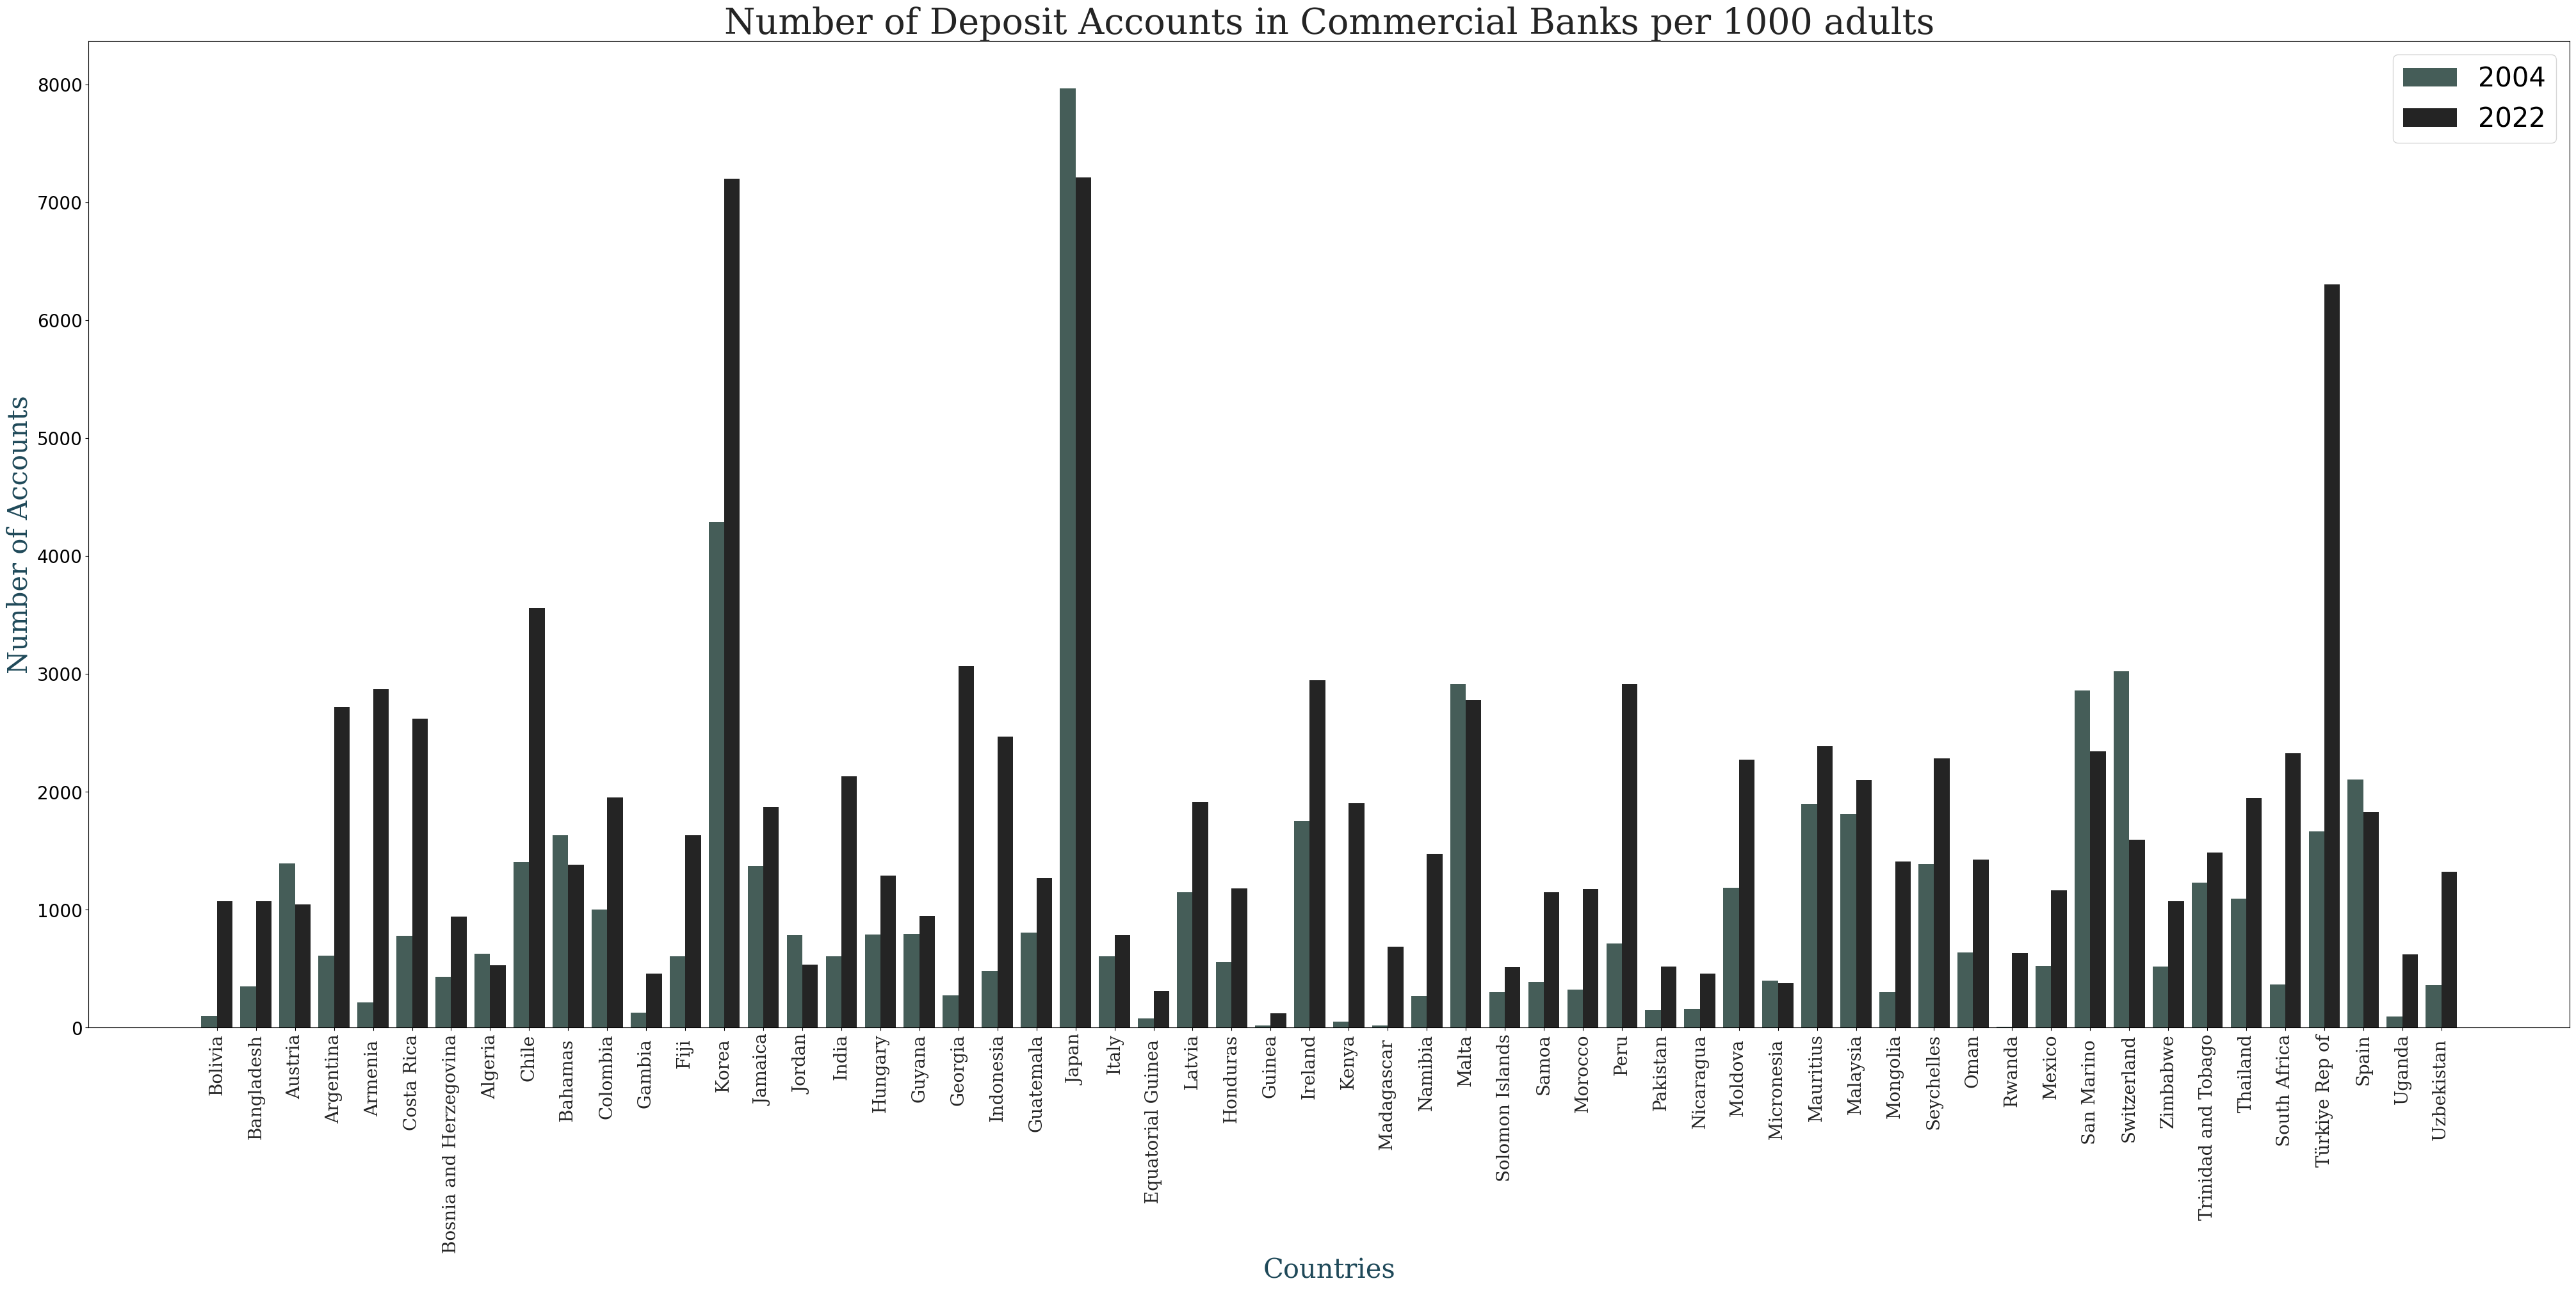

In [ ]:

filename = list(uploaded.keys())[0]
file_contents = uploaded[filename]

financialAccessSurvey = pd.read_csv(io.BytesIO(file_contents))

# DATA CLEANING: Cleaning Columns

#Sort by Indicator Code FCLODDH_XDC, and filter items from 2004 to 2022
financialAccessSurvey = financialAccessSurvey.filter(items=['Country Name', 'Indicator Name', 'Indicator Code','2004', '2022'])
financialAccessSurvey = financialAccessSurvey[(financialAccessSurvey['Indicator Code'] == "FCAODCA_NUM")]

#Change the datatype of all values in the 2022 column from object to float
convert_dict = {'2022': float}
financialAccessSurvey = financialAccessSurvey.astype(convert_dict)

# DATA CLEANING: Cleaning labels

#remove values with null rows
financialAccessSurvey = financialAccessSurvey.dropna()


#financialAccessSurvey = financialAccessSurvey[~financialAccessSurvey['Country Name'].isin(['Korea, Rep. of', 'Equatorial Guinea, Rep. of', 'San Marino, Rep. of', 'Samoa', 'Seychelles', 'Gambia, The', 'Guinea', 'Solomon Islands', 'Bahamas, The'])]

#Cleaning up labels
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace(",", '')
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace("The", '')
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace("Republic of", '')
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace("Rep. of", '')
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace("Federated States of", '')

#financialAccessSurvey = financialAccessSurvey[~financialAccessSurvey['Country Name'].isin(['India', 'Japan', 'Indonesia', 'Türkiye Rep of', 'Korea', 'Micronesia Federated States of', 'San Marino', 'Equatorial Guinea'])]

## MAKING GRAPH 1 FOR HOUSEHOLD SECTOR DEPOSITICS IN DOMESTIC CURRENCY

#Assigning a column to each variable
X = financialAccessSurvey["Country Name"]
Ygirls = financialAccessSurvey["2004"]

Zboys = financialAccessSurvey["2022"]

#Deciding the size of the graph
plt.figure(figsize=(50,20))

X_axis = np.arange(len(X))

#Plotting the bars
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = '2004', color = "#455D58")
plt.bar(X_axis + 0.2, Zboys, 0.4, label = '2022', color = "#242424")

#Fun fonts
font1 = {'family':'serif','color':'#242424','size':40}
font2 = {'family':'serif','color':'#1F4959','size':30}
font3 = {'family':'serif','color':'#242424','size':20}

plt.xticks(X_axis, X, fontdict = font3)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Countries", fontdict = font2)
plt.ylabel("Number of Accounts", fontdict = font2)
plt.title("Number of Deposit Accounts in Commercial Banks per 1000 adults", fontdict = font1)
plt.legend(prop = { "size": 30 })
plt.show()


In [ ]:
upload2 = files.upload()

Saving countries.csv to countries.csv


In [ ]:

filename = list(uploaded.keys())[0]
file_contents = uploaded[filename]

financialAccessSurvey = pd.read_csv(io.BytesIO(file_contents))

filename2 = list(upload2.keys())[0]
file_contents2 = upload2[filename2]

countries = pd.read_csv(io.BytesIO(file_contents2))

# DATA CLEANING: Cleaning Columns

#Sort by Indicator Code, and filter items from 2022
financialAccessSurvey = financialAccessSurvey.filter(items=['Country Name', 'Indicator Name', 'Indicator Code', '2022'])
financialAccessSurvey = financialAccessSurvey[(financialAccessSurvey['Indicator Code'] == "FCAODCHFFA_NUM")]

#Change the datatype of all values in the 2022 column from object to float
convert_dict = {'2022': float}
financialAccessSurvey = financialAccessSurvey.astype(convert_dict)

countries = countries.rename(columns={'name': 'Country Name'})

#merge tables
mergedTable = pd.merge(
    countries, financialAccessSurvey, on=["Country Name"]
    )

# DATA CLEANING: Cleaning labels

#remove values with null rows
mergedTable = mergedTable.dropna()

mergedTable.head(100)



,country,latitude,longitude,Country Name,Indicator Name,Indicator Code,2022
0,AL,41.153332,20.168331,Albania,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,1330.601769
1,AO,-11.202692,17.873887,Angola,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,584.729322
2,AR,-38.416097,-63.616672,Argentina,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,2679.327909
3,BD,23.684994,90.356331,Bangladesh,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,712.872838
5,BW,-22.328474,24.684866,Botswana,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,951.269652
6,CL,-35.675147,-71.542969,Chile,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,3610.696584
8,CO,4.570868,-74.297333,Colombia,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,1547.532057
9,CR,9.748917,-83.753428,Costa Rica,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,2367.315605
10,CY,35.126413,33.429859,Cyprus,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,1487.585052
11,EC,-1.831239,-78.183406,Ecuador,"Key Indicators, Use of Financial Services, Num...",FCAODCHFFA_NUM,1569.257182


<ipython-input-86-b4f27eb3d6f1>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


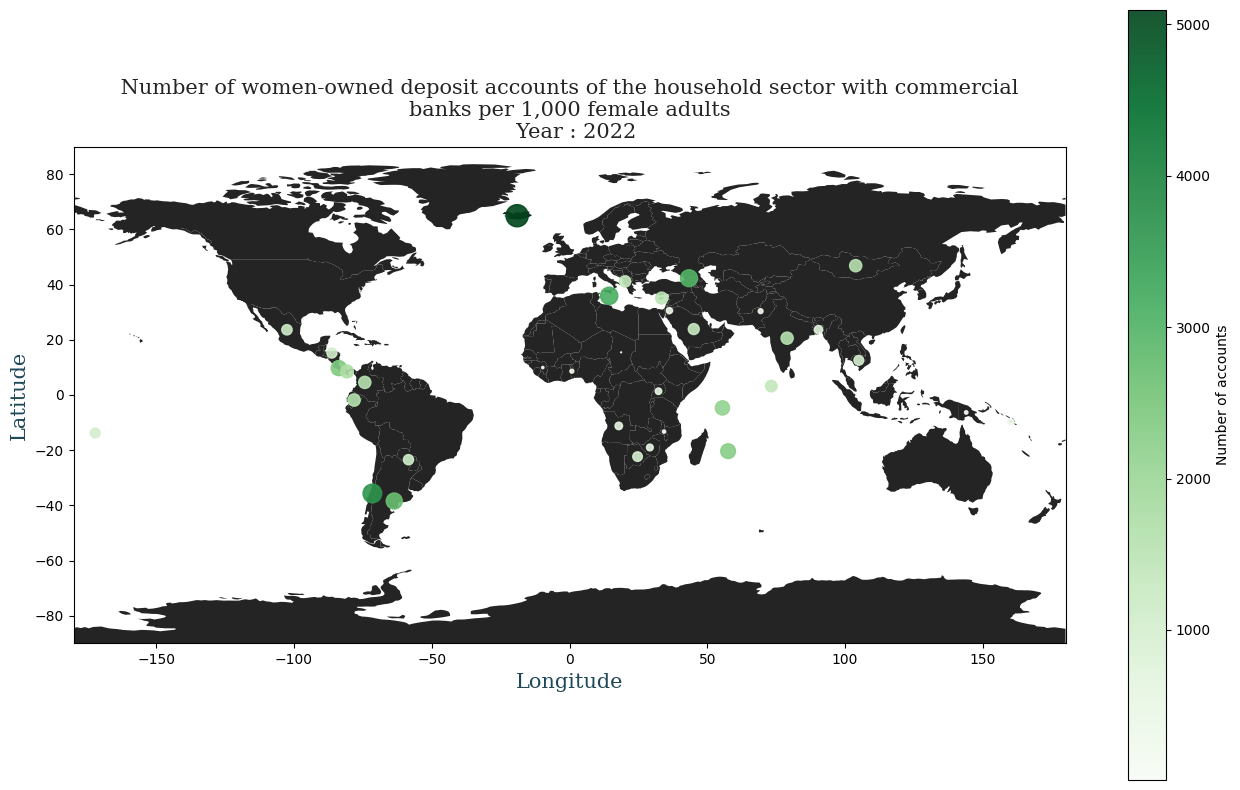

In [ ]:
#Fun fonts
font1 = {'family':'serif','color':'#242424','size':15}
font2 = {'family':'serif','color':'#1F4959','size':15}
font3 = {'family':'serif','color':'#242424','size':20}

# Getting world map data from geo pandas
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="#242424", ax=ax)

# Plotting
x = mergedTable['longitude']
y = mergedTable['latitude']
z = mergedTable['2022']
plt.scatter( x,y,
              s=0.05*z,
              c=z,
              alpha=0.9,
              cmap='Greens'
            )

plt.colorbar(label='Number of accounts')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title(" Number of women-owned deposit accounts of the household sector with commercial \nbanks per 1,000 female adults\n  Year : 2022", font1)
plt.xlabel("Longitude", font2)
plt.ylabel("Latitude", font2)

plt.show()



In [ ]:
mergedTable[['Country Name', '2022']].head(40)

,Country Name,2022
0,Albania,1330.601769
1,Angola,584.729322
2,Argentina,2679.327909
3,Bangladesh,712.872838
5,Botswana,951.269652
6,Chile,3610.696584
8,Colombia,1547.532057
9,Costa Rica,2367.315605
10,Cyprus,1487.585052
11,Ecuador,1569.257182
